# Assignment1: Automatic Playlist Creation
### Driti Singh,11840460

In [2]:
# Importing all the required libraries
from apiclient.discovery import build
import argparse
import csv
import json
import pandas as pd
import time
from sklearn import preprocessing
import numpy as np
from datetime import datetime 
import re
from matplotlib import pyplot as plt

### Data Collection

In [2]:
MY_KEY="API key will come here" 
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

In [3]:
# Creting resource object 'youtube' to interact with Youtube API
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=MY_KEY)

In [4]:
# We will create the playlist for the following three topics
T1='Data Science'
T2='Machine Learning'
T3='Artificial Intelligence'

###### We will run the following sections of code twice( on diferent days)

In [5]:
# We will use the following lists to make the csv file(for Data collection)

# Queried topic
Topic=[] 
# Time when query is made
TimeQueried=[]
# Title of the video
Video_Title=[] 
# Video id of the video
Video_ID=[] 
# Published time & date of the video
Published_At=[]
# Duration of the videos
duration=[]
# no of views of the videos
viewCount=[]
# no of likes of the videos
likeCount=[]
# no of dislikes of the videos
dislikeCount=[]
# no of favorites of the videos
favoriteCount=[]
# Whether the video has caption
caption= [] 
# Whether the video is HD/SD/4K or even below
definition = []  
# For indices
SNo=[]      

TIME=datetime.now()

In [6]:
#################################################### ~~Pagination~~ ##########################################################

# Our goal is to extract atleast 1000 videos for each topic 
# Since, we get just 50 videos on one page, we will use pagination technique to call the API atleast 20 times
# Thus every time a new PageToken will respond and we will get new responses from subsequent new pages.

# make_single_request() takes in the youtube resource and nextPageToken, if any.
def make_single_request(youtube, nextPageToken):
    if nextPageToken is None:
        request = youtube.search().list(q=T1, part='id,snippet',type='video',maxResults=50)
    else:
        request = youtube.search().list(q=T1, part='id,snippet',type='video',pageToken=nextPageToken,maxResults=50)
    response = request.execute()
    return response 

first_response = make_single_request(youtube, None)
nextPageToken = first_response["nextPageToken"]
try:
    count = 0
    while (count<21):
        results = make_single_request(youtube, nextPageToken)
        nextPageToken = results["nextPageToken"]
        for video in results['items']:
            Topic.append(T1)
            Video_Title.append(video['snippet']['title'])
            Video_ID.append(video['id']['videoId'])
            Published_At.append(video['snippet']['publishTime'])
            SNo.append(len(SNo))
            TimeQueried.append(TIME)
        count += 1
except KeyError as e:  # KeyError to catch if nextPageToken wasn't present
    results.pop("items")
len(Video_Title)   #To check how many total videos are fetched

532

In [7]:
# Creating list of topic2 and topic3, (using same Pagination technique). So that we can simply loop, to append the lists.
topics=[T2,T3]

# Here make_single_request() takes in the youtube resource, nextPageToken as well as i(topic1 or topic2), if any.
def make_single_request(youtube, nextPageToken,i):
    if nextPageToken is None:
        request = youtube.search().list(q=i, part='id,snippet',type='video',maxResults=50)
    else:
        request = youtube.search().list(q=i, part='id,snippet',type='video',pageToken=nextPageToken,maxResults=50)
    response = request.execute()
    return response 

for i in topics:
    first_response = make_single_request(youtube, None,i)  
    nextPageToken = first_response["nextPageToken"]
    try:
        count = 0
        while (count<21):
            results = make_single_request(youtube, nextPageToken,i)
            nextPageToken = results["nextPageToken"]
            for video in results['items']:
                Topic.append(i)
                Video_Title.append(video['snippet']['title'])
                Video_ID.append(video['id']['videoId'])
                Published_At.append(video['snippet']['publishTime'])
                SNo.append(len(SNo))
                TimeQueried.append(TIME)
            count += 1
    except KeyError as e:  # KeyError to catch if nextPageToken wasn't present
        results.pop("items")

In [8]:
# Debug call, to check if more video added to the lists.
#These 1603 videos will make our Day1 data
len(Video_ID)

1603

In [9]:
# Second call to the API with the resource video.list to get the STATISTICS of the videos(like, dislike, viewcount etc).
# The duration of the videos are ISO 8601 strings , but we will later convert them into seconds.

for i in Video_ID:
    Stats = youtube.videos().list(id=i,part='contentDetails,id,statistics,status,topicDetails').execute()
    for video_Stat in Stats['items']:     # Extrating the STATISTICS
        duration.append(video_Stat['contentDetails']['duration'])
        if ('viewCount' in video_Stat['statistics']):
            viewCount.append(video_Stat['statistics']['viewCount'])
        else:
            viewCount.append('NA')
        if ( 'likeCount' in video_Stat['statistics'] ):
            likeCount.append(video_Stat['statistics']['likeCount'])
        else:
            likeCount.append('NA')
        if ( 'dislikeCount' in video_Stat['statistics'] ):
            dislikeCount.append(video_Stat['statistics']['dislikeCount'])
        else:
            dislikeCount.append('NA')
        favoriteCount.append(video_Stat['statistics']['favoriteCount'])
        definition.append(video_Stat['contentDetails']['definition'])
        caption.append(video_Stat['contentDetails']['caption'])

In [16]:
#Debug call to check if viewCount updated for all the video ids
#If yes, likeCount, dislikeCount, favoritCount and other lists would have also been successfully updated
len(viewCount)

1603

###### Run following code snippets on day 1, to collect Day1 data

In [29]:
# creating a Pandas Series from lists, so that we can finally create dataframe from it.
data ={
    'Topic' : pd.Series(Topic),
    'TimeQueried' : pd.Series(TimeQueried),
    'Video_Title' : pd.Series(Video_Title),
    'Video_ID' : pd.Series(Video_ID),
    'Published_AT' : pd.Series(Published_At),
    'Duration' : pd.Series(duration),
    'ViewCount': pd.Series(viewCount),
    'LikeCount' : pd.Series(likeCount),
    'DislikeCount' : pd.Series(dislikeCount),
    'favoriteCount' : pd.Series(favoriteCount),
    'Definition' : pd.Series(definition),
    'Caption' : pd.Series(caption), }
# Finally Creating the dataframe, which we can see 
My_dataframe= pd.DataFrame(data, index = SNo)
My_dataframe

,Topic,TimeQueried,Video_Title,Video_ID,Published_AT,Duration,ViewCount,LikeCount,DislikeCount,favoriteCount,Definition,Caption
0,Data Science,2020-08-22 00:45:33.916949,Kriteria &quot;Data Scientist&quot; yang Dicar...,2Gg6KNKRo98,2019-05-13T08:00:01Z,PT5M12S,6270,127,5,0,hd,false
1,Data Science,2020-08-22 00:45:33.916949,Les data sciences - Qu&#39;est-ce que c&#39;es...,vfiLvg5VMrY,2019-09-05T15:24:07Z,PT4M10S,8351,244,2,0,hd,false
2,Data Science,2020-08-22 00:45:33.916949,Сколько зарабатывают в Data Science и что это ...,-OcumqFbu0U,2017-07-06T11:57:13Z,PT8M37S,39782,587,132,0,hd,false
3,Data Science,2020-08-22 00:45:33.916949,Os 5 Tipos de Projetos OBRIGATÓRIOS para o Por...,LJrK4B7bNWA,2020-04-27T10:40:57Z,PT21M57S,4622,476,1,0,hd,false
4,Data Science,2020-08-22 00:45:33.916949,Big Data Analytics | Big Data Explained | Big ...,k7zu3NXEiGY,2018-06-29T13:41:31Z,PT36M4S,54817,788,36,0,hd,false
5,Data Science,2020-08-22 00:45:33.916949,"074. Чем отличаются data analyst, data enginee...",lDkTNURDIaY,2018-11-19T18:46:47Z,PT20M5S,60564,2040,36,0,hd,false
6,Data Science,2020-08-22 00:45:33.916949,What Do You Need to Become a Data Scientist in...,UXi8Ml2UoYk,2019-03-08T08:05:41Z,PT9M19S,418138,7736,232,0,hd,true
7,Data Science,2020-08-22 00:45:33.916949,"Business Intelligence, Data Science y Big Data...",ZFkI8wHOXyA,2019-05-20T06:12:45Z,PT7M28S,13229,420,10,0,hd,false
8,Data Science,2020-08-22 00:45:33.916949,Python free Certification | ibm Free Certifica...,-_VOUvS52aI,2020-06-06T11:45:37Z,PT15M56S,182629,8907,254,0,hd,false
9,Data Science,2020-08-22 00:45:33.916949,Data Science in 10 Minutes with Snowflake and ...,uIONlX5ZUbU,2020-05-21T23:01:38Z,PT11M43S,1059,11,1,0,hd,false


In [30]:
# Making of the csv file
# Finally collecting data
My_dataframe.to_csv("day1data.csv", index = False)

###### Run following code snippets on day 2, to collect Day2 data

In [18]:
# creating a Pandas Series from lists, so that we can finally create dataframe from it.
data2 ={
    'Topic' : pd.Series(Topic),
    'TimeQueried' : pd.Series(TimeQueried),
    'Video_Title' : pd.Series(Video_Title),
    'Video_ID' : pd.Series(Video_ID),
    'Published_AT' : pd.Series(Published_At),
    'Duration' : pd.Series(duration),
    'ViewCount': pd.Series(viewCount),
    'LikeCount' : pd.Series(likeCount),
    'DislikeCount' : pd.Series(dislikeCount),
    'favoriteCount' : pd.Series(favoriteCount),
    'Definition' : pd.Series(definition),
    'Caption' : pd.Series(caption), }
# Finally Creating the dataframe
My_dataframe2= pd.DataFrame(data2, index = SNo)
My_dataframe2

,Topic,TimeQueried,Video_Title,Video_ID,Published_AT,Duration,ViewCount,LikeCount,DislikeCount,favoriteCount,Definition,Caption
0,Data Science,2020-08-22 18:04:40.772675,What are the Prerequisites To Learn Data Science,zKhHXveVQlY,2019-11-21T13:30:31Z,PT4M46S,17240,672,9,0,hd,false
1,Data Science,2020-08-22 18:04:40.772675,Data Science Course - Learn Data Science in 13...,9l0DAYyJJhI,2019-11-23T06:09:22Z,PT13H22M49S,229974,6025,195,0,hd,true
2,Data Science,2020-08-22 18:04:40.772675,Statistics for Data Science Course | Probabili...,H52cgidTwXE,2020-05-17T06:40:36Z,PT6H48M9S,28640,686,46,0,hd,false
3,Data Science,2020-08-22 18:04:40.772675,Data Science vs Computer Science Degree for Da...,v1LZ04WDAOs,2020-03-18T18:39:21Z,PT9M20S,26751,442,16,0,hd,false
4,Data Science,2020-08-22 18:04:40.772675,Data Science Full Course 2020 | Data Science F...,7WRlYJFG7YI,2019-09-18T14:30:01Z,PT9H51M33S,136200,3657,58,0,hd,false
5,Data Science,2020-08-22 18:04:40.772675,Ciência de dados: como é criar o primeiro proj...,L_SZQKv5Cl0,2018-11-16T13:00:03Z,PT6M23S,28837,1840,50,0,hd,false
6,Data Science,2020-08-22 18:04:40.772675,What is Data Science? | How to become a Data S...,_GJ9IDjHaKU,2019-10-25T14:23:33Z,PT26M4S,52862,1690,26,0,hd,false
7,Data Science,2020-08-22 18:04:40.772675,Como é ser data scientist no Nubank,umq9kCJFavw,2019-01-16T21:10:09Z,PT4M8S,70493,3884,34,0,hd,true
8,Data Science,2020-08-22 18:04:40.772675,What is DATA SCIENCE? | Introduction l R Prog...,vs9U0uQvido,2020-02-19T10:40:17Z,PT9M5S,6919,297,5,0,hd,false
9,Data Science,2020-08-22 18:04:40.772675,How I Learned Data Science,n3vw0M5RrPU,2020-01-27T14:41:18Z,PT13M26S,60125,1653,162,0,hd,false


In [19]:
# Making of the csv file
# Finally collecting data
My_dataframe2.to_csv("day2data.csv", index = False)

,Topic,TimeQueried,Video_Title,Video_ID,Published_AT,Duration,ViewCount,LikeCount,DislikeCount,favoriteCount,Definition,Caption
0,Data Science,2020-08-22 18:04:40.772675,What are the Prerequisites To Learn Data Science,zKhHXveVQlY,2019-11-21T13:30:31Z,PT4M46S,17240.0,672.0,9.0,0,hd,False
1,Data Science,2020-08-22 18:04:40.772675,Data Science Course - Learn Data Science in 13...,9l0DAYyJJhI,2019-11-23T06:09:22Z,PT13H22M49S,229974.0,6025.0,195.0,0,hd,True
2,Data Science,2020-08-22 18:04:40.772675,Statistics for Data Science Course | Probabili...,H52cgidTwXE,2020-05-17T06:40:36Z,PT6H48M9S,28640.0,686.0,46.0,0,hd,False
3,Data Science,2020-08-22 18:04:40.772675,Data Science vs Computer Science Degree for Da...,v1LZ04WDAOs,2020-03-18T18:39:21Z,PT9M20S,26751.0,442.0,16.0,0,hd,False
4,Data Science,2020-08-22 18:04:40.772675,Data Science Full Course 2020 | Data Science F...,7WRlYJFG7YI,2019-09-18T14:30:01Z,PT9H51M33S,136200.0,3657.0,58.0,0,hd,False
5,Data Science,2020-08-22 18:04:40.772675,Ciência de dados: como é criar o primeiro proj...,L_SZQKv5Cl0,2018-11-16T13:00:03Z,PT6M23S,28837.0,1840.0,50.0,0,hd,False
6,Data Science,2020-08-22 18:04:40.772675,What is Data Science? | How to become a Data S...,_GJ9IDjHaKU,2019-10-25T14:23:33Z,PT26M4S,52862.0,1690.0,26.0,0,hd,False
7,Data Science,2020-08-22 18:04:40.772675,Como é ser data scientist no Nubank,umq9kCJFavw,2019-01-16T21:10:09Z,PT4M8S,70493.0,3884.0,34.0,0,hd,True
8,Data Science,2020-08-22 18:04:40.772675,What is DATA SCIENCE? | Introduction l R Prog...,vs9U0uQvido,2020-02-19T10:40:17Z,PT9M5S,6919.0,297.0,5.0,0,hd,False
9,Data Science,2020-08-22 18:04:40.772675,How I Learned Data Science,n3vw0M5RrPU,2020-01-27T14:41:18Z,PT13M26S,60125.0,1653.0,162.0,0,hd,False


In [88]:
#Combine both the day1 and day2 data in file 11840460_Solution1.csv 
mergefile = pd.concat([pd.read_csv(file) for file in ('day2data.csv','day2data.csv')])
  
# Convert the above object into a csv file and export
file_out = "11840460_Solution1.csv"
mergefile.to_csv('11840460_Solution1.csv',index= False)

# Replacing all the NA in the file with 0, for the ease of calculation
df=pd.read_csv('11840460_Solution1.csv')
df['LikeCount'] = df['LikeCount'].fillna(0)
df['DislikeCount'] = df['DislikeCount'].fillna(0)
df['ViewCount'] = df['ViewCount'].fillna(0)
df.to_csv('11840460_Solution1.csv',index= False)
len(df) #Debug call

3207

In [87]:
# We observed there were some duplicate videos at same time stamp, thus we need to remove those
df=pd.read_csv('11840460_Solution1.csv')
df.drop_duplicates(keep='first',inplace=True)
# Lets sort the data, by Video_Id's, and if they happen to be same then by TimeQueried
# With this way of sorting, we will get the similar videos of two time stamps(if there exists) consecutively
df=df.sort_values(by=['Video_ID','TimeQueried'])
df.to_csv("11840460_Solution1.csv",index= False)
len(df) #Debug call

2876

### Data cleaning/filtering & manipulation

#### Calculation of Z-scores: <br> We are using pre-built functionality under sklearn.preprocessing.normalize to normalize our data 

In [10]:
# Get dataset
df = pd.read_csv('11840460_Solution1.csv')
l=len(df)
# Normalize ViewCount,LikeCount,DislikeCount,favoriteCount using sklearn.preprocessing.normalize

x_array = np.array(df['ViewCount'])
Zscore_ViewCount = preprocessing.normalize([x_array])
x_array = np.array(df['LikeCount'])
Zscore_LikeCount = preprocessing.normalize([x_array])
x_array = np.array(df['DislikeCount'])
Zscore_DislikeCount = preprocessing.normalize([x_array])

min=df['favoriteCount'].min()
max=df['favoriteCount'].max()
if(max-min != 0):
    x_array = np.array(df['favoriteCount'])
    Zscore_favoriteCount = preprocessing.normalize([x_array])
else:
    Zscore_favoriteCount=np.zeros(l)
Zscore_Definition=np.zeros(l)

# If Defination=hd,sd,else , set Zscore_Defination=1,.5,0 respectively (already in the range of 0-1)
for i in range(l):
    if(df['Definition'][i]=='hd'):
        Zscore_Definition[i]=1
    elif(df['Definition'][i]=='sd'):
        Zscore_Definition[i]=0.5
    else:
        Zscore_Definition.append(0)
        
# If caption=True, set  Zscore_Caption=1, else 0 (already in the range of 0-1)
Zscore_Caption = np.zeros(l)
for i in range(l):
    if(df['Caption'][i]==True):
        Zscore_Caption[i]=1

# Initially we will set Zscore_Trend=0 for all videos, we will set it 1,only after observing the trend(Exlained breifly in approach.pdf!)
Zscore_Trend = np.zeros(l)

# Lets add all these normalized values to the file!!!
Zscore_ViewCount=Zscore_ViewCount.reshape(l,1)
df["Zscore_ViewCount"] = Zscore_ViewCount
df.to_csv("11840460_Solution1.csv")

Zscore_LikeCount=Zscore_LikeCount.reshape(l,1)
df["Zscore_LikeCount"] = Zscore_LikeCount
df.to_csv("11840460_Solution1.csv")

Zscore_DislikeCount=Zscore_DislikeCount.reshape(l,1)
df["Zscore_DislikeCount"] = Zscore_DislikeCount
df.to_csv("11840460_Solution1.csv")

Zscore_favoriteCount=Zscore_favoriteCount.reshape(l,1)
df["Zscore_favoriteCount"] = Zscore_favoriteCount
df.to_csv("11840460_Solution1.csv")

Zscore_Definition=Zscore_Definition.reshape(l,1)
df["Zscore_Definition"] = Zscore_Definition
df.to_csv("11840460_Solution1.csv")

Zscore_Caption=Zscore_Caption.reshape(l,1)
df["Zscore_Caption"] = Zscore_Caption
df.to_csv("11840460_Solution1.csv")

Zscore_Trend=Zscore_Trend.reshape(l,1)
df["Zscore_Trend"] = Zscore_Trend
df.to_csv("11840460_Solution1.csv")

### Scoring: 
###### We are giving certain weights to all the  statistics which determine the score<br>ViewCount=2<br>LikeCount=1<br>DislikeCount=1<br>favoriteCount=.5<br>Definition=.5<br>Caption=.5<br>Trend=.5(which is initially 0, for all videos)
<br> See more detailed explaination, and logic in the approach pdf!

In [13]:
# This is not the final score
# We will use these score to observe the trend, and then calculate our Final score!
Score = np.zeros(2876)
for i in range(2876):
    Score[i]=((Zscore_ViewCount[i])*2) + (Zscore_LikeCount[i]) - (Zscore_DislikeCount[i]) + (Zscore_favoriteCount[i]*.5) + (Zscore_Definition[i]*.5) + (Zscore_Caption[i]*.5) + (Zscore_Trend[i]*.5)

In [14]:
#Adding 'Score' field in our file
Score=Score.reshape(l,1)
df["Score"] = Score
df.to_csv("11840460_Solution1.csv",index= False)
df

,Topic,TimeQueried,Video_Title,Video_ID,Published_AT,Duration,ViewCount,LikeCount,DislikeCount,favoriteCount,Definition,Caption,Zscore_ViewCount,Zscore_LikeCount,Zscore_DislikeCount,Zscore_favoriteCount,Zscore_Definition,Zscore_Caption,Zscore_Trend,Score
0,Artificial Intelligence,2020-08-22 0:45:34,artificial intelligence (kecerdasan buatan) se...,-6OQVRgOHu8,2019-11-09T14:57:50Z,PT18M26S,6160,132,8,0,hd,False,7.553796e-05,1.013703e-04,0.000178,0.0,1.0,0.0,0.0,0.500075
1,Artificial Intelligence,2020-08-22 18:04:41,artificial intelligence (kecerdasan buatan) se...,-6OQVRgOHu8,2019-11-09T14:57:50Z,PT18M26S,6169,132,8,0,hd,False,7.564832e-05,1.013703e-04,0.000178,0.0,1.0,0.0,0.0,0.500075
2,Data Science,2020-08-22 0:45:34,Can You Become a Data Scientist?,-AkBfBWr_Gw,2018-08-14T15:20:59Z,PT7M55S,736754,11449,394,0,hd,True,9.034560e-03,8.792341e-03,0.008755,0.0,1.0,1.0,0.0,1.018106
3,Data Science,2020-08-22 18:04:41,Can You Become a Data Scientist?,-AkBfBWr_Gw,2018-08-14T15:20:59Z,PT7M55S,736980,11453,394,0,hd,True,9.037332e-03,8.795412e-03,0.008755,0.0,1.0,1.0,0.0,1.018115
4,Artificial Intelligence,2020-08-22 0:45:34,The Evolution of Artificial Intelligence and M...,-Bouv9Q8YOI,2020-08-16T15:01:41Z,PT6M17S,258,10,0,0,hd,False,3.163765e-06,7.679571e-06,0.000000,0.0,1.0,0.0,0.0,0.500014
5,Artificial Intelligence,2020-08-22 18:04:41,The Evolution of Artificial Intelligence and M...,-Bouv9Q8YOI,2020-08-16T15:01:41Z,PT6M17S,266,10,0,0,hd,False,3.261866e-06,7.679571e-06,0.000000,0.0,1.0,0.0,0.0,0.500014
6,Artificial Intelligence,2020-08-22 0:45:34,Master | Artificial Intelligence | University ...,-D8GM4cKoMs,2017-05-04T08:32:25Z,PT2M18S,25835,272,5,0,hd,False,3.168057e-04,2.088843e-04,0.000111,0.0,1.0,0.0,0.0,0.500731
7,Artificial Intelligence,2020-08-22 18:04:41,Master | Artificial Intelligence | University ...,-D8GM4cKoMs,2017-05-04T08:32:25Z,PT2M18S,25841,272,5,0,hd,False,3.168793e-04,2.088843e-04,0.000111,0.0,1.0,0.0,0.0,0.500732
8,Machine Learning,2020-08-22 0:45:34,Machine Learning In 5 Minutes | Machine Learni...,-DEL6SVRPw0,2019-02-19T15:25:57Z,PT4M38S,152901,436,11,0,hd,False,1.874972e-03,3.348293e-04,0.000244,0.0,1.0,0.0,0.0,0.503840
9,Machine Learning,2020-08-22 18:04:41,Machine Learning In 5 Minutes | Machine Learni...,-DEL6SVRPw0,2019-02-19T15:25:57Z,PT4M38S,153040,436,11,0,hd,False,1.876677e-03,3.348293e-04,0.000244,0.0,1.0,0.0,0.0,0.503844


####  Final Scoring after observing the trend:
###### For the similar Video_ID's (one from day1 and another from day2 data) if the initial score(given in previous step) increases i.e If score for a particular video increases on day2, we will set the Zscore_trend attribute as 1 and then calculate our final score 
See more detailed explaination, and approach in the approach pdf

In [93]:
# Creating a empty dataframe
column_names = ["Topic", "TimeQueried", "Video_Title","Video_ID","Published_AT","Duration","ViewCount","LikeCount","DislikeCount","favoriteCount","Definition","Caption","Zscore_Trend","Score"]
df = pd.DataFrame(columns = column_names)

#Code to check which Video_ID's are similar, then observing the trend (see if their scores are increasing) 
#If yes, updating the score(calculating final score),and if not copying he same score in the new csv file(The final scoring file)
df2=pd.read_csv('11840460_Solution1.csv')
df2['Video_ID'].append(None)
l=len(df2['Video_ID'])
i=0
while(True):
    if(i>=l-1):
        break
    else:
        if(df2['Video_ID'][i]==df2['Video_ID'][i+1]):
            if(df2['Score'][i+1]>df2['Score'][i]):
                df2.loc[i,'Zscore_Trend']=1
                df2.loc[i,'Score'] = df2['Score'][i]+0.5*df2['Zscore_Trend'][i] # As the weight for Trend is 0.5 
                df.loc[df2.index[i]] = df2.iloc[i]
            else:
                df.loc[df2.index[i]] = df2.iloc[i]
            if((i+2)<=(l-1)):
                i+=2
            else:
                break
        else:
            df.loc[df2.index[i]] = df2.iloc[i]
            i+=1
# "11840460_Solution1_score.csv" file will contain the final scores of each video.
df.to_csv("11840460_Solution1_score.csv",index= False)
df=pd.read_csv('11840460_Solution1_score.csv')
df.head(10)

,Topic,TimeQueried,Video_Title,Video_ID,Published_AT,Duration,ViewCount,LikeCount,DislikeCount,favoriteCount,Definition,Caption,Zscore_Trend,Score
0,Artificial Intelligence,2020-08-22 0:45:34,artificial intelligence (kecerdasan buatan) se...,-6OQVRgOHu8,2019-11-09T14:57:50Z,PT18M26S,6160,132,8,0,hd,False,1,1.000075
1,Data Science,2020-08-22 0:45:34,Can You Become a Data Scientist?,-AkBfBWr_Gw,2018-08-14T15:20:59Z,PT7M55S,736754,11449,394,0,hd,True,1,1.518106
2,Artificial Intelligence,2020-08-22 0:45:34,The Evolution of Artificial Intelligence and M...,-Bouv9Q8YOI,2020-08-16T15:01:41Z,PT6M17S,258,10,0,0,hd,False,1,1.000014
3,Artificial Intelligence,2020-08-22 0:45:34,Master | Artificial Intelligence | University ...,-D8GM4cKoMs,2017-05-04T08:32:25Z,PT2M18S,25835,272,5,0,hd,False,1,1.000731
4,Machine Learning,2020-08-22 0:45:34,Machine Learning In 5 Minutes | Machine Learni...,-DEL6SVRPw0,2019-02-19T15:25:57Z,PT4M38S,152901,436,11,0,hd,False,1,1.003840
5,Machine Learning,2020-08-22 0:45:34,Apa itu Machine Learning? Inilah cara mudah me...,-G5-kHF57OU,2019-03-17T16:53:35Z,PT8M20S,9845,210,4,0,sd,False,1,0.750314
6,Artificial Intelligence,2020-08-22 0:45:34,Effect of Artificial Intelligence on Education...,-GECSptc9vQ,2018-10-04T20:41:32Z,PT7M22S,14480,161,16,0,hd,False,1,1.000123
7,Artificial Intelligence,2020-08-22 0:45:34,Tesla: Full Autonomy &amp; Artificial Intellig...,-IECosXLb8g,2020-07-09T20:50:37Z,PT13M20S,88787,4834,77,0,hd,False,1,1.004179
8,Artificial Intelligence,2020-08-22 0:45:34,Artificial Intelligence -The Blue Fairy,-JS43jbdOZk,2008-02-19T21:17:20Z,PT5M22S,382424,1779,51,0,sd,False,1,0.759612
9,Data Science,2020-08-22 0:45:34,Announcement For Give Away For Women Data Scie...,-JU9qAzF01c,2020-08-16T16:39:56Z,PT17M21S,5828,188,44,0,hd,False,0,0.499310


Now seperate the videos of each topic 

In [139]:
# "Data_Science.csv" shall contain the cleaned videos of Data Science topic.
column_names = ["Topic", "TimeQueried", "Video_Title","Video_ID","Published_AT","Duration","ViewCount","LikeCount","DislikeCount","favoriteCount","Definition","Caption","Zscore_Trend","Score"]
df = pd.DataFrame(columns = column_names)

df2=pd.read_csv('11840460_Solution1_score.csv')
l=len(df2)
for i in range(l):
    if(df2['Topic'][i]=='Data Science'):
        df.loc[df2.index[i]] = df2.iloc[i]
df.to_csv('Data_Science.csv',index= False)

# "Machine_Learning.csv" shall contain the cleaned videos of Machine Learning topic.

column_names = ["Topic", "TimeQueried", "Video_Title","Video_ID","Published_AT","Duration","ViewCount","LikeCount","DislikeCount","favoriteCount","Definition","Caption","Zscore_Trend","Score"]
df = pd.DataFrame(columns = column_names)
for i in range(l):
    if(df2['Topic'][i]=='Machine Learning'):
        df.loc[df2.index[i]] = df2.iloc[i]
df.to_csv('Machine_Learning.csv',index= False)

# "Artificial Intelligence.csv" shall contain the cleaned videos of Artificial Intelligence topic.

column_names = ["Topic", "TimeQueried", "Video_Title","Video_ID","Published_AT","Duration","ViewCount","LikeCount","DislikeCount","favoriteCount","Definition","Caption","Zscore_Trend","Score"]
df = pd.DataFrame(columns = column_names)
for i in range(l):
    if(df2['Topic'][i]=='Artificial Intelligence'):
        df.loc[df2.index[i]] = df2.iloc[i]
df.to_csv('Artificial Intelligence.csv',index= False)

In [140]:
#Code to convert the Duration of videos in seconds-
#ref: https://stackoverflow.com/questions/16742381/how-to-convert-youtube-api-duration-to-seconds

def ytDurationToSeconds(duration):
    week = 0
    day  = 0
    hour = 0
    min  = 0
    sec  = 0

    duration = duration.lower()

    value = ''
    for c in duration:
        if c.isdigit():
            value += c
            continue

        elif c == 'p':
            pass
        elif c == 't':
            pass
        elif c == 'w':
            week = int(value) * 604800
        elif c == 'd':
            day = int(value)  * 86400
        elif c == 'h':
            hour = int(value) * 3600
        elif c == 'm':
            min = int(value)  * 60
        elif c == 's':
            sec = int(value)

        value = ''

    return week + day + hour + min + sec

In [141]:
# Converting from string format of video-Durations to seconds in all the 3 topic csv files- 

df1=pd.read_csv('Data_Science.csv')
for i in range(len(df1)):
    temp=ytDurationToSeconds(df1['Duration'][i])
    df1.loc[i,'Duration']=temp
df1.to_csv('Data_Science.csv',index= False)
    
df2=pd.read_csv('Machine_Learning.csv')
for i in range(len(df2)):
    temp=ytDurationToSeconds(df2['Duration'][i])
    df2.loc[i,'Duration']=temp
df2.to_csv('Machine_Learning.csv',index= False)
    
df3=pd.read_csv('Artificial Intelligence.csv')
for i in range(len(df3)):
    temp=ytDurationToSeconds(df3['Duration'][i])
    df3.loc[i,'Duration']=temp
df3.to_csv('Artificial Intelligence.csv',index= False)

 ## Data Analysis

### Ranking

In [45]:
# Ranking
#For ranking we will first sort by Score,then Published_AT, because we will prefer a newer video if score is same for any two videos
T=['Data_Science.csv','Machine_Learning.csv','Artificial Intelligence.csv']
for i in T:
    df=pd.read_csv(i)
    df=df.sort_values(by=['Score','Published_AT'],ascending=[False,False])
    df.to_csv(i,index= False)

### Visualization

Lets Visualize the rankings of the three topics first. From the below graph it is clear that:<br>
Among the videos of all the topics, A Machine Learning video has got the highest score(2.051350).<br>
We can also see that for all topics, the mode score is something around 1(an almost horizontal line at 1)

Text(0, 0.5, 'Score')

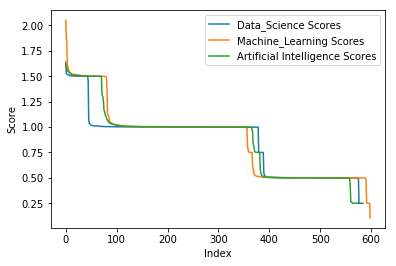

In [46]:
df=pd.read_csv('Data_Science.csv')
df2=pd.read_csv('Machine_Learning.csv')
df3=pd.read_csv('Artificial Intelligence.csv')
plt.plot(df.Score)
plt.plot(df2.Score)
plt.plot(df3.Score)
plt.legend(["Data_Science Scores","Machine_Learning Scores","Artificial Intelligence Scores"])
plt.xlabel("Index")
plt.ylabel("Score")

Now, lets observe the trends in LikeCount, DislikeCount, ViewCount graphically-<br>
From the below drawn plots, its visible that all LikeCount, DislikeCount & ViewCount increases significantly for index 1000(and/or around),but as the ViewCounts have greater weightage,also their increase is quite large, the score for index 1000(and/or around) will certainly increase.

Text(0, 0.5, 'LikeCount')

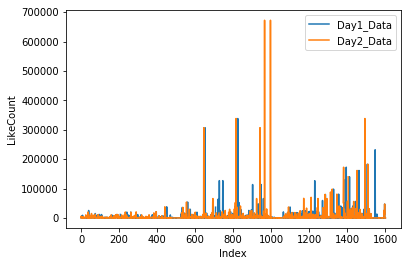

In [31]:
df=pd.read_csv('day1data.csv')
df=df.head(1603)
df=df.LikeCount
df2=pd.read_csv('day2data.csv')
df2=df2.LikeCount
ax = df.plot()
df2.plot(ax=ax)
plt.legend(["Day1_Data","Day2_Data"])
plt.xlabel("Index")
plt.ylabel("LikeCount")

Text(0, 0.5, 'DislikeCount')

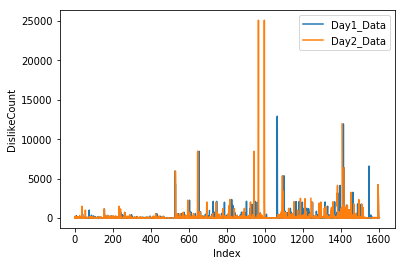

In [3]:
df=pd.read_csv('day1data.csv')
df=df.head(1603)
df=df.DislikeCount
df2=pd.read_csv('day2data.csv')
df2=df2.DislikeCount
ax = df.plot()
df2.plot(ax=ax)
plt.legend(["Day1_Data","Day2_Data"])
plt.xlabel("Index")
plt.ylabel("DislikeCount")

Text(0, 0.5, 'ViewCount')

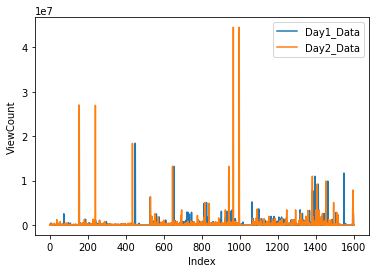

In [32]:
df=pd.read_csv('day1data.csv')
df=df.head(1603)
df=df.ViewCount
df2=pd.read_csv('day2data.csv')
df2=df2.ViewCount
ax = df.plot()
df2.plot(ax=ax)
plt.legend(["Day1_Data","Day2_Data"])
plt.xlabel("Index")
plt.ylabel("ViewCount")

If we try to observe the statistics of Data Science, we see that no.of dislikes are very less in comparison to the no.of likes as well as viewCount, except at the index 0(and/or around) and 50(and/or around) 

Text(0, 0.5, 'ViewCount')

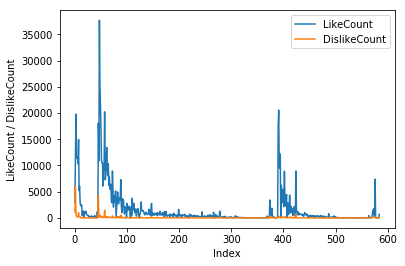

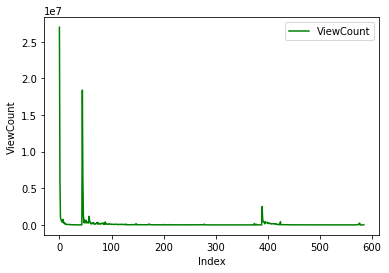

In [16]:
df=pd.read_csv('Data_Science.csv')
df1=df.LikeCount
df2=df.DislikeCount
ax = df1.plot()
df2.plot(ax=ax)
plt.xlabel("Index")
plt.ylabel("LikeCount / DislikeCount")
plt.legend(["LikeCount","DislikeCount"])
df.plot(y='ViewCount', use_index=True,color='green')
plt.xlabel("Index")
plt.ylabel("ViewCount")

If we try to observe the statistics of Machine_Learning, we see that no.of dislikes are very less in comparison to the no.of likes as well as viewCount, even at the index 0.<br>
Thus this justify, why we get maximumm score for a Machine_Learning video.

Text(0, 0.5, 'ViewCount')

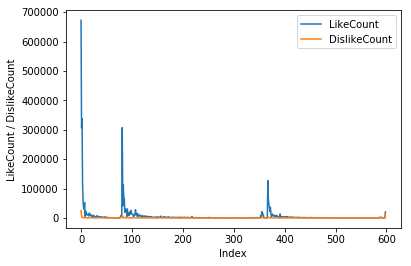

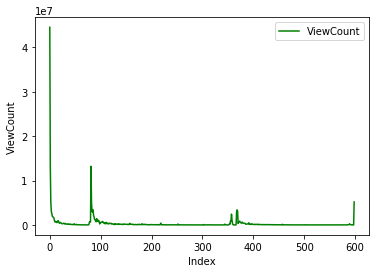

In [15]:
df=pd.read_csv('Machine_Learning.csv')
df=df.head(1603)
df1=df.LikeCount
df2=df.DislikeCount
ax = df1.plot()
df2.plot(ax=ax)
plt.xlabel("Index")
plt.ylabel("LikeCount / DislikeCount")
plt.legend(["LikeCount","DislikeCount"])
df.plot(y='ViewCount', use_index=True,color='green')
plt.xlabel("Index")
plt.ylabel("ViewCount")

Lets observe the same for Artificial Intelligence

Text(0, 0.5, 'ViewCount')

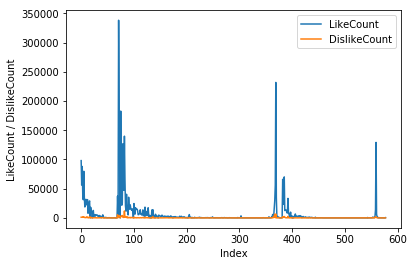

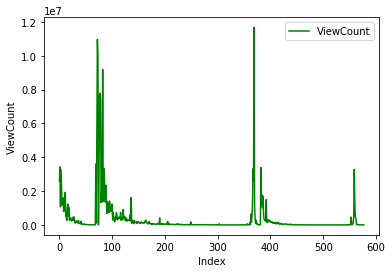

In [17]:
df=pd.read_csv('Artificial Intelligence.csv')
df=df.head(1603)
df1=df.LikeCount
df2=df.DislikeCount
ax = df1.plot()
df2.plot(ax=ax)
plt.xlabel("Index")
plt.ylabel("LikeCount / DislikeCount")
plt.legend(["LikeCount","DislikeCount"])
df.plot(y='ViewCount', use_index=True,color='green')
plt.xlabel("Index")
plt.ylabel("ViewCount")

Lets see the video definitions of our cleaned data-<br>
Mostly videos are hd, a few are also sd, but no video is 4k or below.

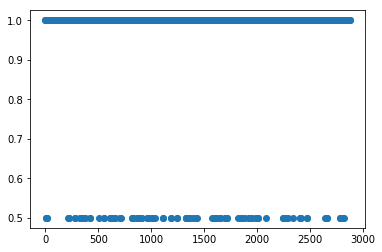

In [32]:
df=pd.read_csv('11840460_Solution1.csv')
df=df.Zscore_Definition
df.plot(style="o")

# Playlist Creation Algorithm:<br>
My friend has no more than 11 hrs to master the topics, thus each playlist is not more than 11hrs(39600seconds).<br>
My algorithm creates a playlist of 5-11 hours depending upon the rank(sorted scores) and a threshold score=mean of all the scores of the respective topic

In [154]:
T=['Data_Science.csv','Machine_Learning.csv','Artificial Intelligence.csv']
No.of.Videos=[]
for i in T:
    df=pd.read_csv(i)
    mean_score=df['Score'].mean()
    duration=0
    for j in range(len(df)):
        if(df['Score'][j]>=mean_score):
            duration+=df['Duration'][j]
            if(duration>39600):                 #11hrs= 11*60*60 = 39600 secs
                duration-=df['Duration'][j]
                No.of.Videos.append(j)
                break
No.of.Videos

[8, 13, 27]

## Lets finally create the Playlists
### Data_Science_Playlist
(Duration: NOT MORE THAN 11 Hrs)

In [156]:
df=pd.read_csv('Data_Science.csv')
column_names = ["Topic", "TimeQueried", "Video_Title","Video_ID","Published_AT","Duration","ViewCount","LikeCount","DislikeCount","favoriteCount","Definition","Caption","Score"]
Data_Science_Playlist= pd.DataFrame(columns = column_names)
for i in range(8):
    Data_Science_Playlist.loc[df.index[i]] = df.iloc[i]
Data_Science_Playlist
    

,Topic,TimeQueried,Video_Title,Video_ID,Published_AT,Duration,ViewCount,LikeCount,DislikeCount,favoriteCount,Definition,Caption,Score
0,Data Science,2020-08-22 0:45:34,Learn Data Science Online!,cZv091_n-5k,2019-02-08T15:37:38Z,33,26973000,2908,1140,0,hd,False,1.638422
1,Data Science,2020-08-22 0:45:34,Daata {HD &amp; Eng Subs} - Hindi Full Movie -...,gUuosA9eQ7s,2018-03-13T14:30:01Z,10245,6135526,12318,5952,0,hd,True,1.527671
2,Data Science,2020-08-22 0:45:34,Data Science: Reality vs Expectations ($100k+ ...,8LucP1wiX1g,2018-02-09T22:57:01Z,720,1015033,19823,701,0,hd,True,1.524540
3,Data Science,2020-08-22 0:45:34,Can You Become a Data Scientist?,-AkBfBWr_Gw,2018-08-14T15:20:59Z,475,736754,11449,394,0,hd,True,1.518106
4,Data Science,2020-08-22 0:45:34,How to Become a Data Analyst in 2020,5HlbV1wKBmo,2019-08-13T13:29:38Z,511,485636,11679,162,0,hd,True,1.517279
5,Data Science,2020-08-22 0:45:34,Statistics for Data Science | Probability and ...,Vfo5le26IhY,2019-12-20T07:17:27Z,25971,430564,11477,169,0,hd,True,1.515618
6,Data Science,2020-08-22 0:45:34,The NBA Data Scientist,MpLHMKTolVw,2019-05-17T18:43:49Z,486,372765,10296,304,0,hd,True,1.510294
7,Data Science,2020-08-22 0:45:34,Why I left my Data Science Job at FANG (Facebo...,M5v1nXiUaOI,2019-04-12T01:44:41Z,917,750300,14961,995,0,hd,True,1.507780


### Machine_Learning_Playlist
(Duration: NOT MORE THAN 11 Hrs)

In [158]:
df=pd.read_csv('Machine_Learning.csv')
column_names = ["Topic", "TimeQueried", "Video_Title","Video_ID","Published_AT","Duration","ViewCount","LikeCount","DislikeCount","favoriteCount","Definition","Caption","Score"]
Machine_Learning_Playlist= pd.DataFrame(columns = column_names)
for i in range(13):
    Machine_Learning_Playlist.loc[df.index[i]] = df.iloc[i]
Machine_Learning_Playlist

,Topic,TimeQueried,Video_Title,Video_ID,Published_AT,Duration,ViewCount,LikeCount,DislikeCount,favoriteCount,Definition,Caption,Score
0,Machine Learning,2020-08-22 18:04:41,How Far is Too Far? | The Age of A.I.,UwsrzCVZAb8,2019-12-18T17:00:08Z,2080,44560150,672433,25106,0,hd,True,2.051350
1,Machine Learning,2020-08-22 0:45:34,Stealing Baseball Signs with a Phone (Machine ...,PmlRbfSavbI,2019-06-30T17:23:23Z,849,13186727,306668,8468,0,hd,True,1.870742
2,Machine Learning,2020-08-22 0:45:34,How Machines Learn,R9OHn5ZF4Uo,2017-12-18T14:39:33Z,535,5042018,338075,2333,0,hd,True,1.831441
3,Machine Learning,2020-08-22 0:45:34,Fallout 4 - Intro Cinematic (Colorized using A...,gYNajpnyZiM,2019-07-21T17:15:49Z,196,3083265,113520,2115,0,hd,True,1.615797
4,Machine Learning,2020-08-22 0:45:34,Hello World - Machine Learning Recipes #1,cKxRvEZd3Mw,2016-03-30T16:59:12Z,413,2468094,54029,547,0,hd,True,1.589867
5,Machine Learning,2020-08-22 0:45:34,What is backpropagation really doing? | Deep l...,Ilg3gGewQ5U,2017-11-03T14:03:37Z,834,1964132,35684,301,0,hd,True,1.568886
6,Machine Learning,2020-08-22 18:04:41,The 7 steps of machine learning,nKW8Ndu7Mjw,2017-08-31T19:19:11Z,636,1807881,29456,712,0,hd,True,1.551138
7,Machine Learning,2020-08-22 0:45:34,🖥️ WRITING MY FIRST MACHINE LEARNING GAME! (1/4),ZX2Hyu5WoFg,2017-12-08T18:30:01Z,529,1732190,52307,1585,0,hd,True,1.547430
8,Machine Learning,2020-08-22 0:45:34,How machine learning is being used to help sav...,sgCGHBek1To,2019-10-24T22:19:44Z,87,1579182,5450,141,0,hd,True,1.539782
9,Machine Learning,2020-08-22 0:45:34,Artificial Intelligence Full Course | Artifici...,JMUxmLyrhSk,2019-06-02T08:53:49Z,17571,1056534,23420,424,0,hd,True,1.534475


### Artificial_Intelligence_Playlist 
(Duration: NOT MORE THAN 11 Hrs)

In [159]:
df=pd.read_csv('Artificial Intelligence.csv')
column_names = ["Topic", "TimeQueried", "Video_Title","Video_ID","Published_AT","Duration","ViewCount","LikeCount","DislikeCount","favoriteCount","Definition","Caption","Score"]
Artificial_Intelligence_Playlist= pd.DataFrame(columns = column_names)
for i in range(27):
    Artificial_Intelligence_Playlist.loc[df.index[i]] = df.iloc[i]
Artificial_Intelligence_Playlist

,Topic,TimeQueried,Video_Title,Video_ID,Published_AT,Duration,ViewCount,LikeCount,DislikeCount,favoriteCount,Definition,Caption,Score
0,Artificial Intelligence,2020-08-22 0:45:34,Artificial Intelligence,5J5bDQHQR1g,2016-12-22T16:12:59Z,707,2577989,98013,1150,0,hd,True,1.612941
1,Artificial Intelligence,2020-08-22 0:45:34,AlphaGo - The Movie | Full Documentary,WXuK6gekU1Y,2020-03-13T14:04:51Z,5428,3426377,56190,1234,0,hd,True,1.599763
2,Artificial Intelligence,2020-08-22 0:45:34,Inteligência Artificial jogando o jogo mais di...,fc45RArghtY,2019-10-07T22:27:38Z,781,1070509,88030,1253,0,hd,True,1.566014
3,Artificial Intelligence,2020-08-22 0:45:34,In the Age of AI (full film) | FRONTLINE,5dZ_lvDgevk,2019-12-02T19:00:56Z,6857,3264128,40628,2040,0,hd,True,1.565922
4,Artificial Intelligence,2020-08-22 0:45:34,What happens when our computers get smarter th...,MnT1xgZgkpk,2015-04-27T16:15:54Z,992,2261463,31126,1295,0,hd,True,1.550589
5,Artificial Intelligence,2020-08-22 0:45:34,The Artificial Intelligence That Deleted A Cen...,-JlxuQ7tPgQ,2018-12-06T16:00:00Z,376,1185774,79772,1851,0,hd,True,1.549210
6,Artificial Intelligence,2020-08-22 0:45:34,Elon Musk: Tesla Autopilot | Lex Fridman Podca...,dEv99vxKjVI,2019-04-12T15:19:13Z,1965,1198373,34864,738,0,hd,True,1.539765
7,Artificial Intelligence,2020-08-22 0:45:34,Artificial intelligence &amp; algorithms: pros...,s0dMTAQM4cw,2019-09-26T18:00:05Z,2546,1597040,18747,805,0,hd,True,1.535676
8,Artificial Intelligence,2020-08-22 0:45:34,How This Guy Uses A.I. to Create Art | Obsesse...,I-EIVlHvHRM,2020-01-16T17:00:08Z,633,786516,31074,484,0,hd,True,1.532398
9,Artificial Intelligence,2020-08-22 0:45:34,"Elon Musk: Neuralink, AI, Autopilot, and the P...",smK9dgdTl40,2019-11-12T17:35:22Z,2170,976001,31792,738,0,hd,True,1.531952


#### Lets finally see the total number of videos, we are recommending from each topic, such that the the duration is not more than 11 hrs 

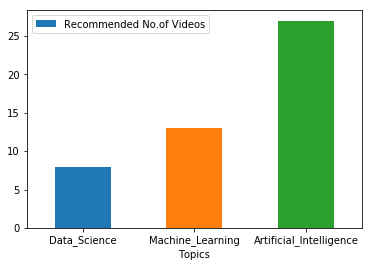

In [43]:
df = pd.DataFrame({'Topics':['Data_Science', 'Machine_Learning', 'Artificial_Intelligence'], 'Recommended No.of Videos':[8, 13, 27]})
ax = df.plot.bar(x='Topics', y='Recommended No.of Videos', rot=0)